<a href="https://colab.research.google.com/github/69421/mbacke2801/blob/main/Lab_14_Data_Visualization_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-05 00:49:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  16.5MB/s    in 14s     

2025-06-05 00:49:29 (14.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [12]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [57]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [14]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [15]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


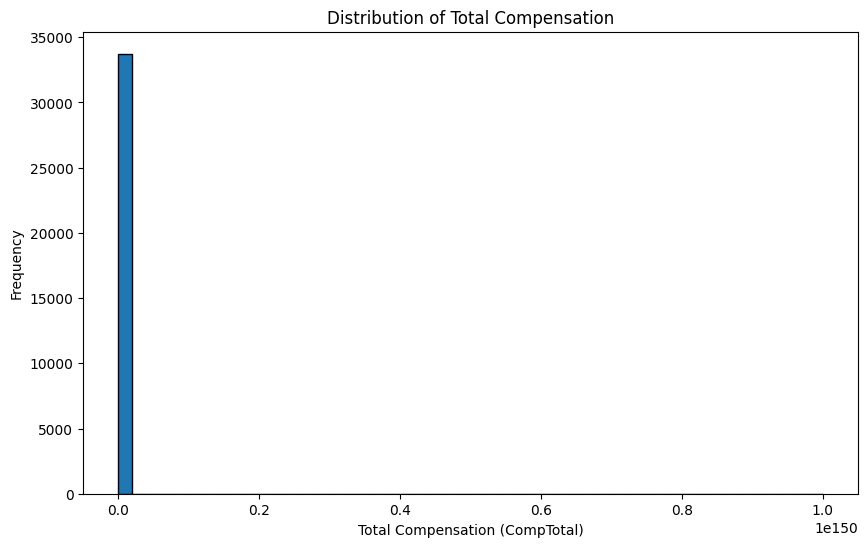

In [16]:
## Write your code here
QUERY = "SELECT CompTotal FROM main"
df_comptotal = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df_comptotal['CompTotal'], bins=50, edgecolor='black')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [10]:
df.columns

Index(['COUNT(*)'], dtype='object')

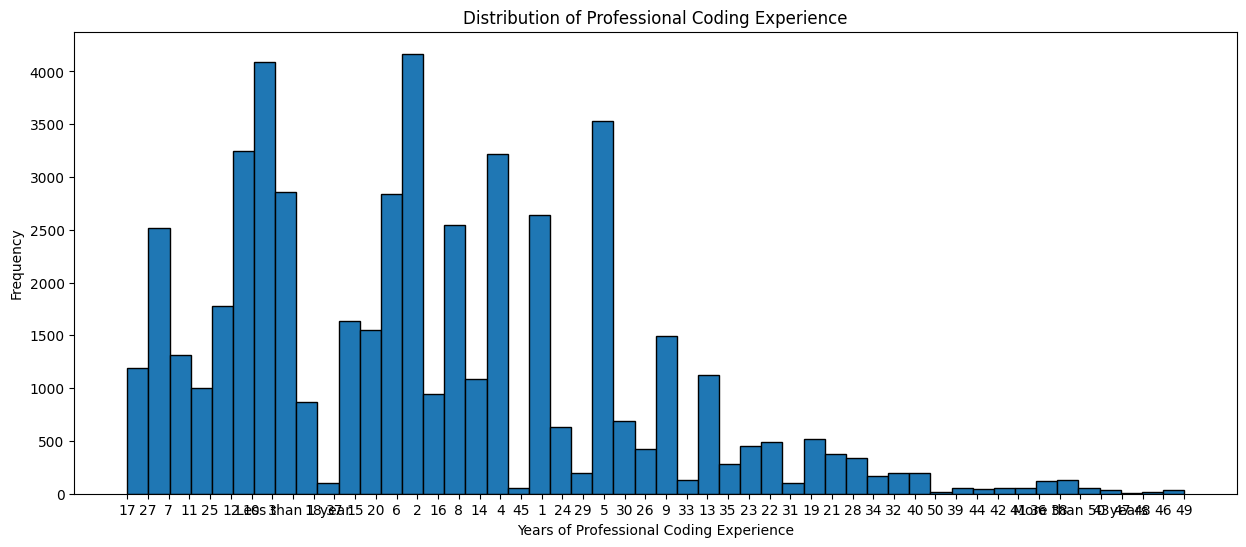

In [18]:
## Write your code here
QUERY = "SELECT YearsCodePro FROM main"
df_yearscodepro = pd.read_sql_query(QUERY, conn)

df_yearscodepro.dropna(subset=['YearsCodePro'], inplace=True)


plt.figure(figsize=(15, 6))

plt.hist(df_yearscodepro['YearsCodePro'], bins=50, edgecolor='black')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Professional Coding Experience')
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


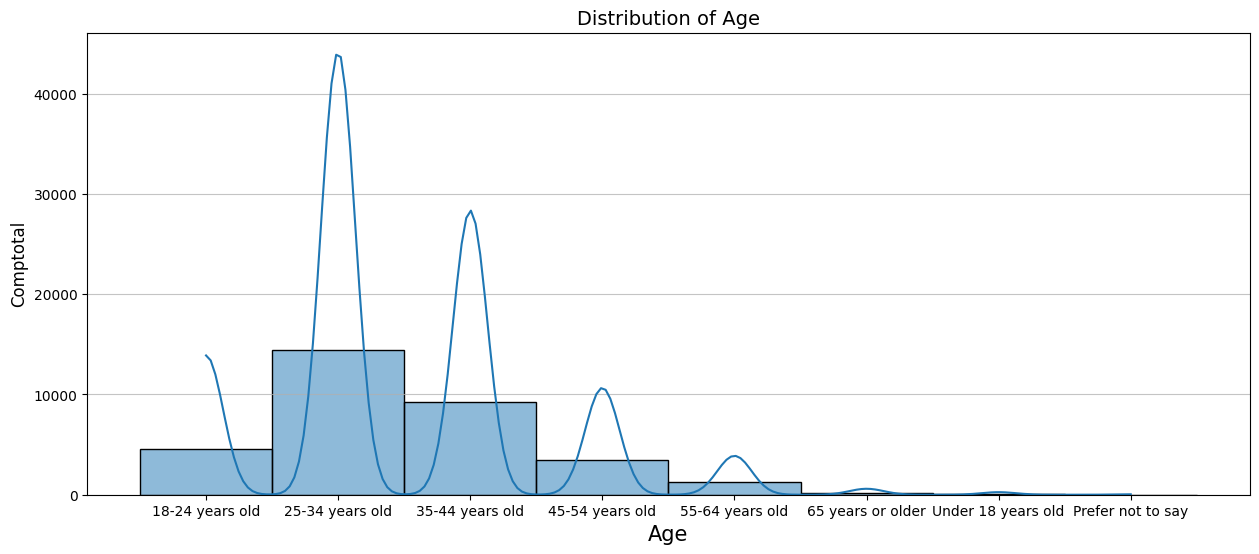

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt # Ensure matplotlib is imported if not already

## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age_comptotal = pd.read_sql_query(QUERY, conn)

# Apply dropna to the correct DataFrame (df_age_comptotal)
df_age_comptotal = df_age_comptotal.dropna(subset=["CompTotal", "Age"])

# Apply filtering for CompTotal to the correct DataFrame
df_age_comptotal = df_age_comptotal[df_age_comptotal["CompTotal"] > 0]  # Supprime les salaires nuls ou négatifs
df_age_comptotal = df_age_comptotal[df_age_comptotal["CompTotal"] < df_age_comptotal["CompTotal"].quantile(0.99)]  # Élimine les valeurs extrêmes


plt.figure(figsize=(15, 6)) # Set figure size

# Plot a standard 1D histogram of the 'Age' column
sns.histplot(
    data=df_age_comptotal,
    x="Age",        # Age on the x-axis
    bins=50,        # Number of bins for the histogram
    kde=True,       # Add a KDE plot for a smoother curve (optional)
    edgecolor='black' # Add edges to bars for clarity
)

plt.title("Distribution of Age", fontsize=14) # Title of the plot
plt.xlabel("Age", fontsize=15) # Label for the x-axis
plt.ylabel("Comptotal", fontsize=12) # Label for the y-axis (standard for 1D hist)
plt.grid(axis='y', alpha=0.75) # Add a grid for better readability
plt.show()

# The code below is from the previous attempt to plot CompTotal by Age group using hue,
# which aligns with the original objective 2.1.
# You can run this code as well if you want to see that visualization.
#
# plt.figure(figsize=(14, 7))
#
# sns.histplot(
#     data=df_age_comptotal,
#     x="CompTotal",
#     hue="Age",
#     element="step",         # histogrammes superposés
#     stat="density",         # pour normaliser (facilite la comparaison)
#     common_norm=False,      # chaque groupe est normalisé individuellement
#     bins=50
# )
#
# plt.title("Distribution de CompTotal par groupe d'âge", fontsize=14)
# plt.xlabel("Compensation Totale", fontsize=12)
# plt.ylabel("Densité", fontsize=12)
# plt.legend(title="Tranche d’âge", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.subplots_adjust(right=0.8)
# plt.grid(True)
# plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


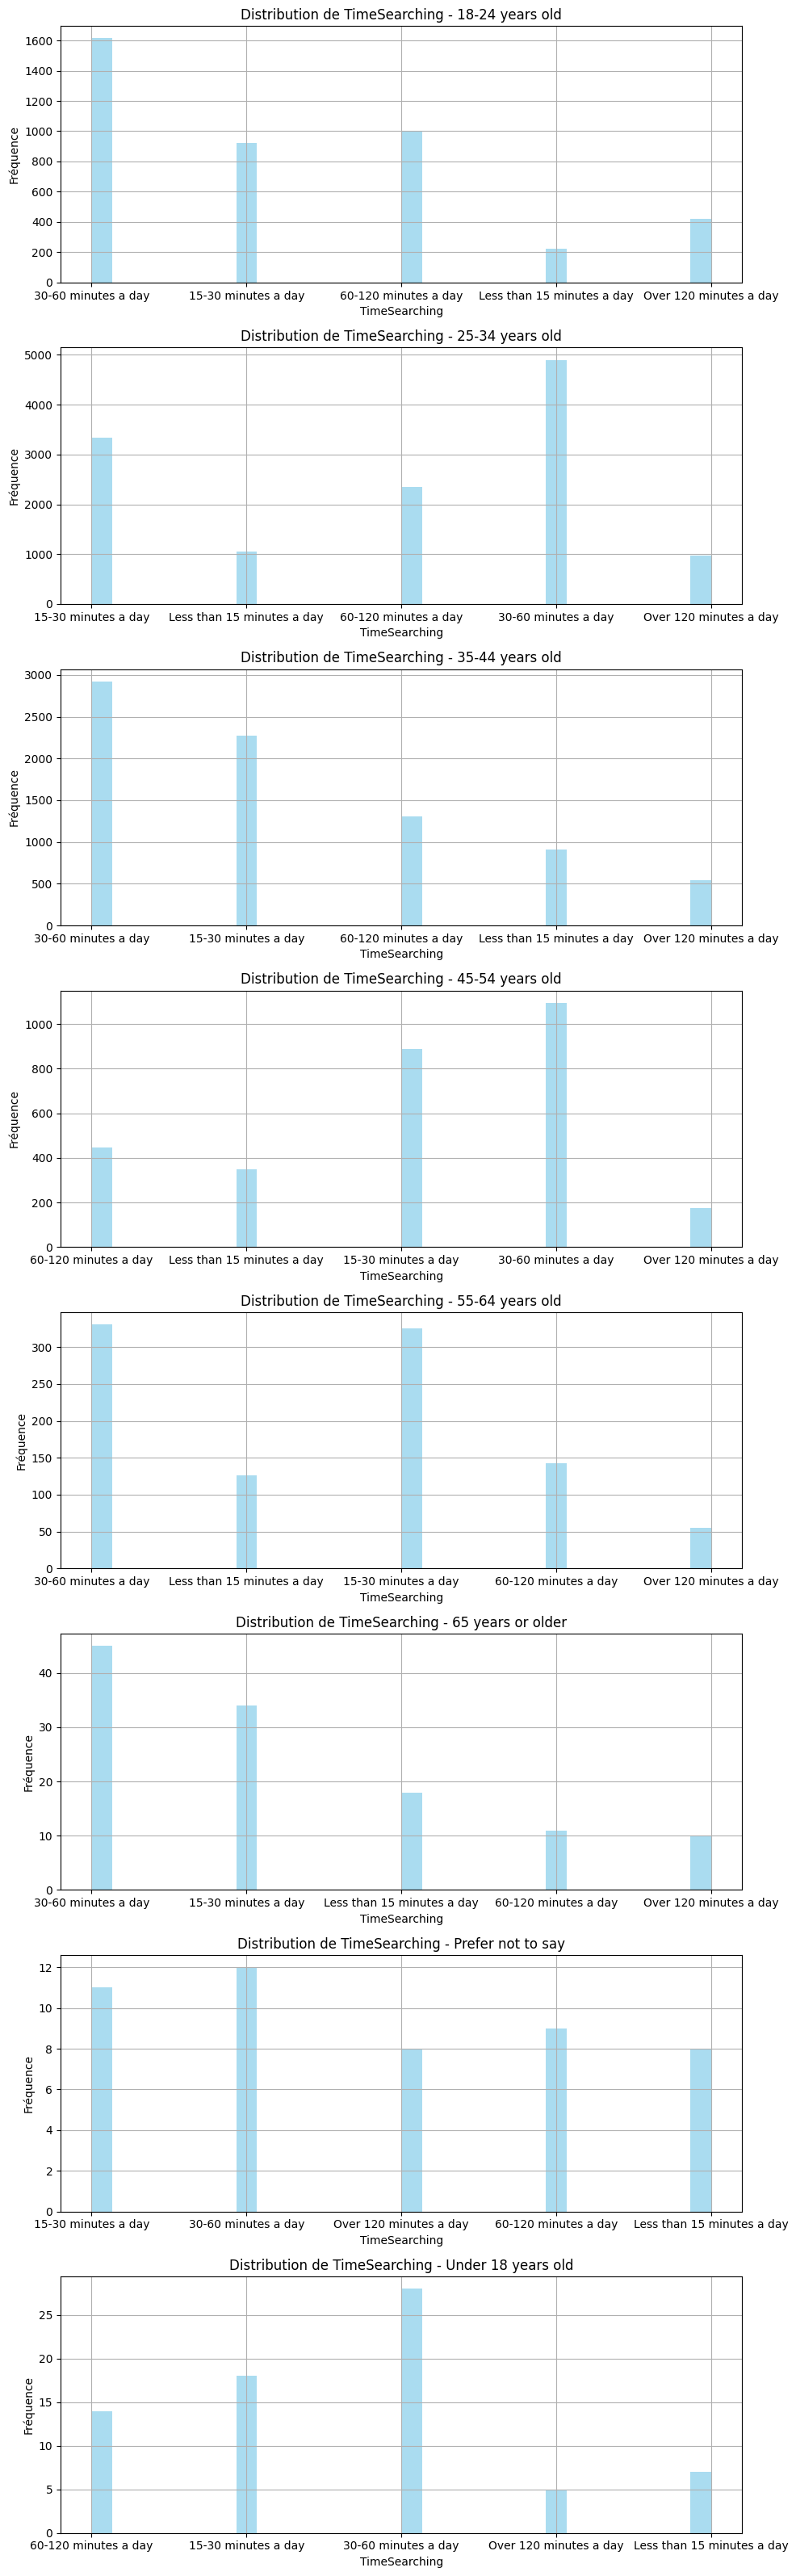

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Requête et chargement
QUERY = "SELECT TimeSearching, Age FROM main"
df = pd.read_sql_query(QUERY, conn)

# Nettoyage
df = df.dropna(subset=["TimeSearching", "Age"])
age_groups = df["Age"].unique()

# Création d'une grille de sous-graphes
fig, axes = plt.subplots(nrows=len(age_groups), ncols=1, figsize=(10, 4 * len(age_groups)))

for i, age in enumerate(sorted(age_groups)):
    subset = df[df["Age"] == age]
    subset["TimeSearching"].hist(ax=axes[i], bins=30, alpha=0.7, color='skyblue')
    axes[i].set_title(f"Distribution de TimeSearching - {age}")
    axes[i].set_xlabel("TimeSearching")
    axes[i].set_ylabel("Fréquence")

plt.tight_layout()
plt.show()



### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


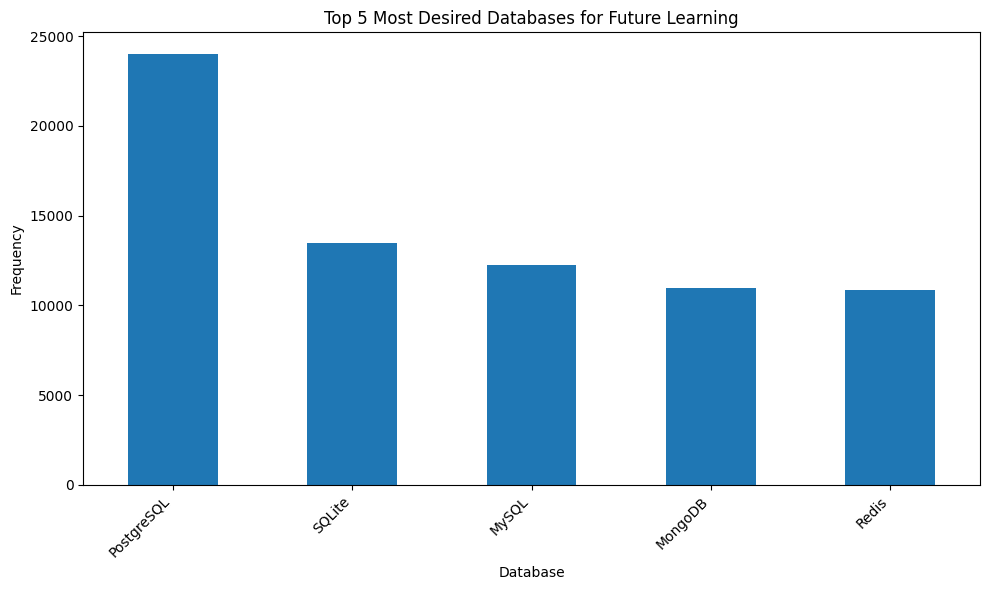

In [49]:
## Write your code here
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df_database = pd.read_sql_query(QUERY, conn)

# Split the comma-separated strings and create a list of individual databases
databases_list = df_database['DatabaseWantToWorkWith'].dropna().str.split(';').sum()

# Count the occurrences of each database
database_counts = pd.Series(databases_list).value_counts()

# Get the top 5 databases
top_5_databases = database_counts.head(5)

# Create a bar plot of the top 5 databases
plt.figure(figsize=(10, 6))
top_5_databases.plot(kind='bar')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


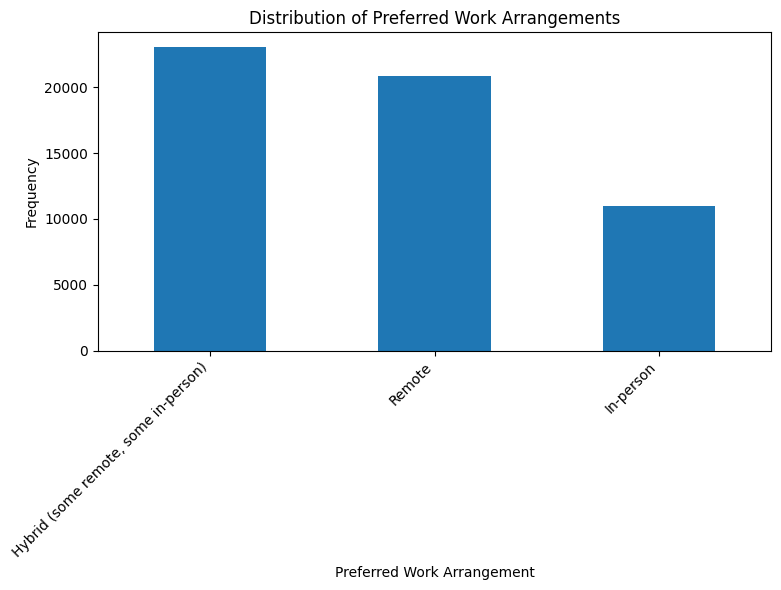

In [50]:
## Write your code here
QUERY = "SELECT RemoteWork FROM main"
df_remotework = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each work arrangement category
remotework_counts = df_remotework['RemoteWork'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
remotework_counts.plot(kind='bar')
plt.xlabel('Preferred Work Arrangement')
plt.ylabel('Frequency')
plt.title('Distribution of Preferred Work Arrangements')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


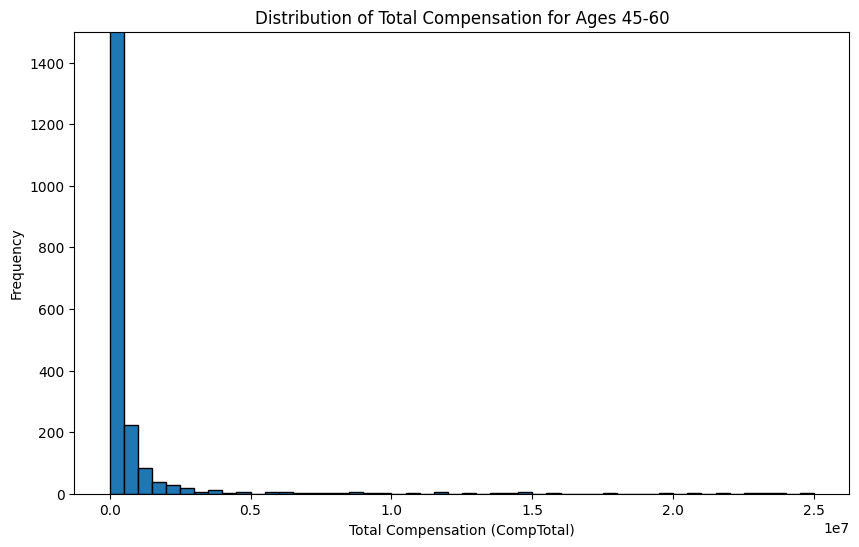

In [64]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
"""
# Fetch the data using the updated query that includes CompTotal
df = pd.read_sql_query(QUERY, conn)

# Garder uniquement les tranches d'âge 45 à 60
mid_career_ages = ["45-54 years old"]
df_mid = df[df["Age"].isin(mid_career_ages)].copy() # Use .copy() to avoid SettingWithCopyWarning

# Nettoyage de CompTotal : retirer les valeurs manquantes ou aberrantes
# Now CompTotal exists in df_mid, so dropna can be applied.
df_mid = df_mid.dropna(subset=["CompTotal"])
df_mid = df_mid[df_mid["CompTotal"] > 0]
df_mid = df_mid[df_mid["CompTotal"] < df_mid["CompTotal"].quantile(0.99)]  # On retire les gros outliers

# You can now proceed with plotting the histogram of CompTotal for df_mid
plt.figure(figsize=(10, 6))
plt.hist(df_mid['CompTotal'], bins=50, edgecolor='black')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation for Ages 45-60')
plt.ylim(0,1500)
plt.show()

In [56]:
df.head()


,TimeSearching,Age
10,30-60 minutes a day,35-44 years old
12,30-60 minutes a day,35-44 years old
15,60-120 minutes a day,45-54 years old
18,15-30 minutes a day,25-34 years old
20,Less than 15 minutes a day,25-34 years old


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


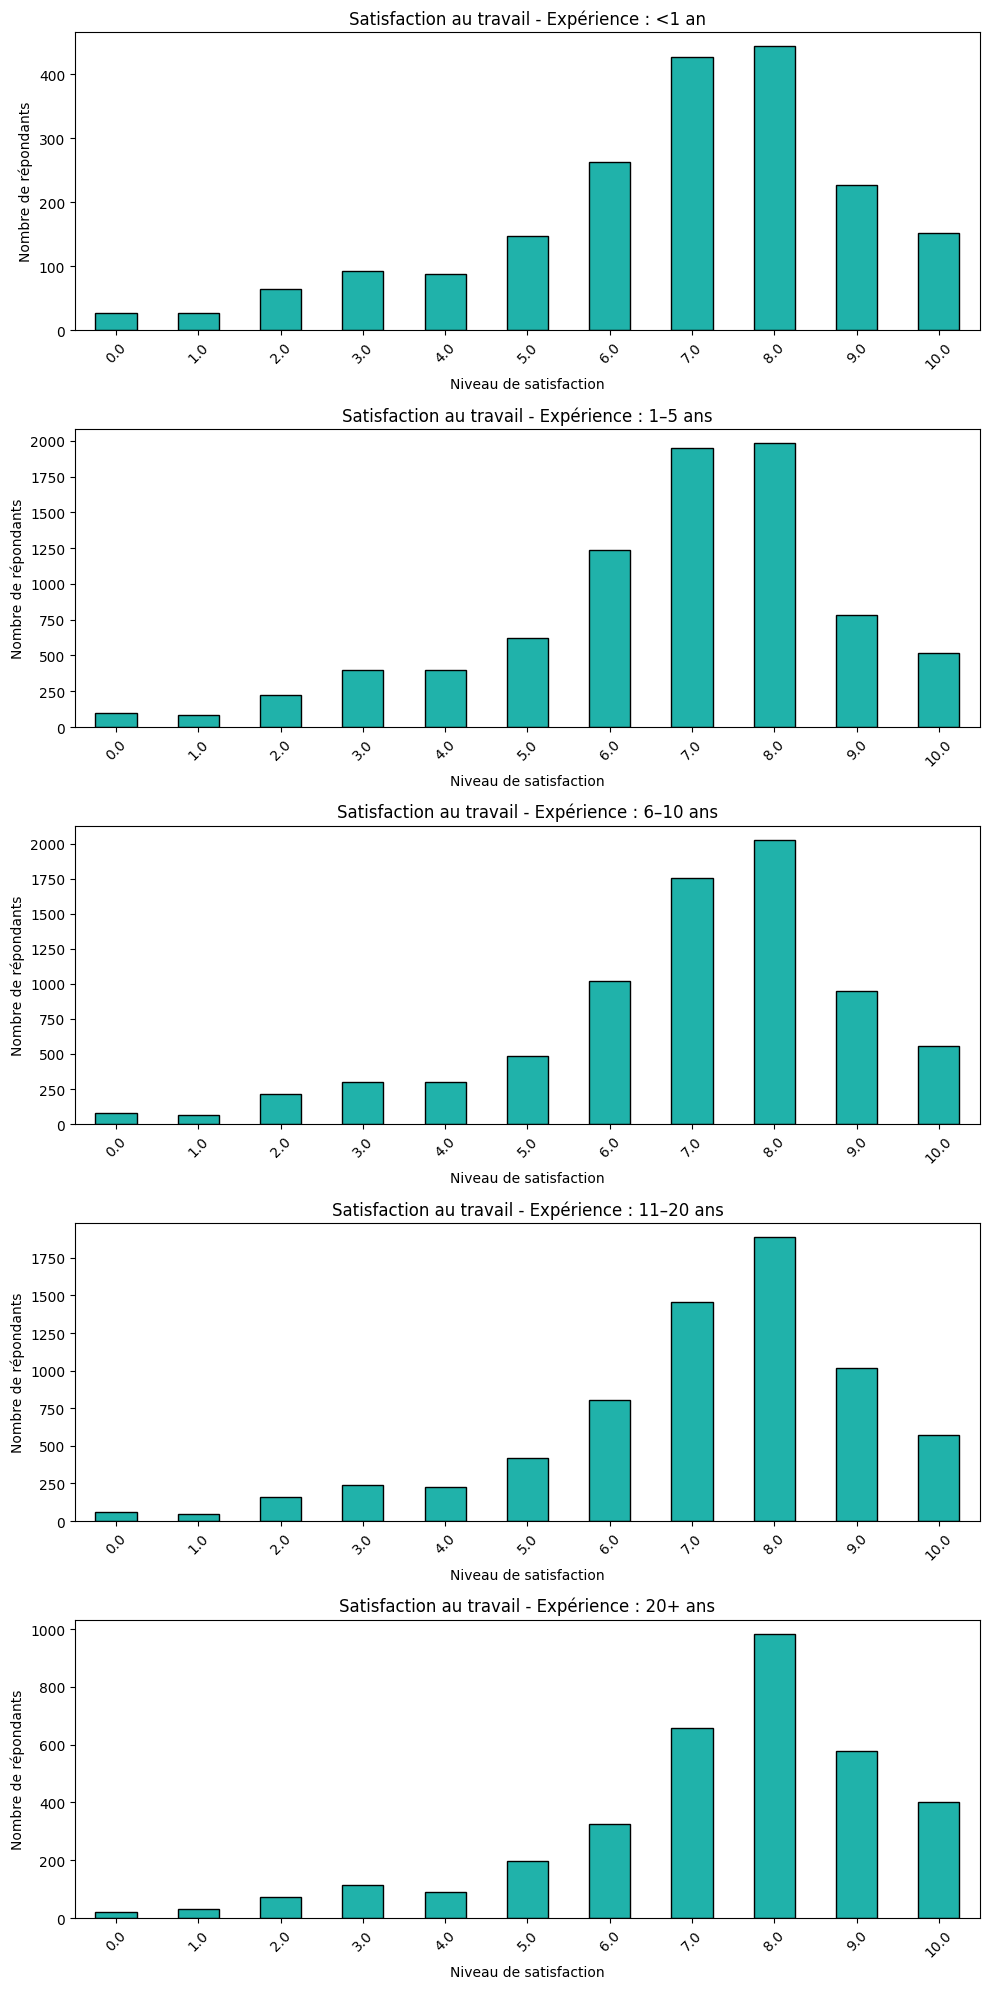

In [72]:
## Write your code here
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
# Fetch the data into the correct DataFrame
df_jobsat_yearscodepro = pd.read_sql_query(QUERY, conn)

# Nettoyer les années d'expérience using the correct DataFrame
df_jobsat_yearscodepro["YearsCodePro"] = df_jobsat_yearscodepro["YearsCodePro"].replace({
    "Less than 1 year": 0.5,
    "More than 50 years": 51
})
# Convert to numeric, handling errors
df_jobsat_yearscodepro["YearsCodePro"] = pd.to_numeric(df_jobsat_yearscodepro["YearsCodePro"], errors="coerce")

# Nettoyer les lignes avec valeurs manquantes using the correct DataFrame
df_jobsat_yearscodepro = df_jobsat_yearscodepro.dropna(subset=["YearsCodePro", "JobSat"])

# Créer des catégories d'expérience using the correct DataFrame
bins = [0, 1, 5, 10, 20, 51]
labels = ["<1 an", "1–5 ans", "6–10 ans", "11–20 ans", "20+ ans"]
df_jobsat_yearscodepro["ExperienceGroup"] = pd.cut(df_jobsat_yearscodepro["YearsCodePro"], bins=bins, labels=labels)

# Ensure matplotlib is imported (already done at the beginning of the notebook)
import matplotlib.pyplot as plt

# Liste des groupes d'expérience from the correct DataFrame
# Ensure the labels are sorted correctly for plotting order
exp_groups = pd.Categorical(df_jobsat_yearscodepro["ExperienceGroup"], categories=labels, ordered=True).categories


# Création des sous-graphes
fig, axes = plt.subplots(nrows=len(exp_groups), ncols=1, figsize=(10, 4 * len(exp_groups)))

# Iterate through the sorted categories
for i, group in enumerate(exp_groups):
    # Subset using the correct DataFrame
    subset = df_jobsat_yearscodepro[df_jobsat_yearscodepro["ExperienceGroup"] == group]

    # Plot value counts using the correct subset
    # Sort the index to ensure consistent plotting order for JobSat levels
    subset["JobSat"].value_counts().sort_index().plot(
        kind="bar",
        ax=axes[i],
        color="lightseagreen",
        edgecolor="black"
    )
    axes[i].set_title(f"Satisfaction au travail - Expérience : {group}")
    axes[i].set_ylabel("Nombre de répondants")
    axes[i].set_xlabel("Niveau de satisfaction")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [73]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
